In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import librosa
import pandas as pd

# Path to dataset
dataset_path = '/content/drive/My Drive/MUSIC-REC-SYSTEM/data/'

music_list = pd.read_csv(dataset_path + 'music_list.csv')

user_behavior_list = pd.read_csv(dataset_path + 'user_behavior_list.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/MUSIC-REC-SYSTEM/data/music_list.csv'

In [1]:
%pip install pandas
%pip install librosa

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import librosa
import pandas as pd

# Path to dataset
dataset_path = 'C:\\Users\\User\\Downloads\\AI\\data\\'

music_list = pd.read_csv(dataset_path + 'music_list.csv')

user_behavior_list = pd.read_csv(dataset_path + 'user_behavior_list.csv')

In [2]:
#Checking null values
print("\n\nUser Behavior Null values")
print(user_behavior_list.isnull().sum())



User Behavior Null values
track_id     0
user_id      0
playcount    0
dtype: int64


# Preprocessing

## Preprocess for user_behaviour

### Grouping

In [3]:
#Grouping songs of each user

user_song_list = (
  user_behavior_list
  .groupby('user_id', observed=True)[['track_id', 'playcount']]
  .apply(lambda x: list(zip(x['track_id'], x['playcount'])))
  .to_dict()
)

In [4]:
dict(list(user_song_list.items())[:5])

{'00000b722001882066dff9d2da8a775658053ea0': [('TRQEBOU128F425D087', 1)],
 '00001638d6189236866af9bbf309ae6c2347ffdc': [('TRBCDMC128F1452976', 1)],
 '0000175652312d12576d9e6b84f600caa24c4715': [('TRHVDTF128F428D64C', 1)],
 '00001cf0dce3fb22b0df0f3a1d9cd21e38385372': [('TRZPDFG128F92FDEF5', 2),
  ('TRKABMK128F426BF72', 2),
  ('TRGEIDA128F933B4B8', 1),
  ('TRTPXAP12903CA1A14', 2),
  ('TRIYKXW128F92FDF08', 2),
  ('TRVRIBZ128F426BF71', 1),
  ('TRPUGUW128F426BF6F', 1),
  ('TREZYWT128F93191B7', 2)],
 '0000267bde1b3a70ea75cf2b2d216cb828e3202b': [('TRPXIWX128F429831F', 1),
  ('TRJGDTG128F421CE22', 1),
  ('TRORDNM128F427560D', 1),
  ('TRLTISM128F424FEFB', 1),
  ('TRIVDZY12903CC7671', 1),
  ('TREXNUE128F92FFC12', 1),
  ('TRODQGV128F425FD7E', 1),
  ('TRSMXVB128F42858BC', 1),
  ('TRXVQAJ128F9316B65', 1)]}

### Remove less active user

Removing users with listening history less than 50 songs

In [5]:
user_song_list = {user: songs for user, songs in user_song_list.items() if len(songs) >= 50}

In [6]:
display(user_song_list)

{'0003a64f7a69e5b87a80b09c3772227185c235c7': [('TRRCWXH128F42B917C', 1),
  ('TRMHZLT12903CEA646', 1),
  ('TROVIQH128F42B91A1', 1),
  ('TRDNHAW128F429DB9A', 1),
  ('TRBVSQT128F427A82F', 1),
  ('TRAFUNV128F92CFEB2', 2),
  ('TRRXFHO128EF3550BC', 1),
  ('TRKQLRS128F4230F04', 1),
  ('TRBVNWT128F93173BA', 1),
  ('TRYYDLF128F423BB17', 1),
  ('TRUWRWK128F92E16B6', 1),
  ('TRMPTXE128F9303E92', 1),
  ('TRNGKOQ128E0780DAC', 1),
  ('TRVKPXM128F4284E60', 1),
  ('TRHTYWL128F429EFD8', 1),
  ('TRBROBA128F9321BC2', 3),
  ('TRFNDHN128F426BE40', 1),
  ('TRAVRKY128F429EA68', 1),
  ('TRILTQH128F93264C4', 1),
  ('TRUTKSF128F147B0E2', 1),
  ('TRBXLFU128F427A494', 1),
  ('TRRUZLF128F42396D0', 1),
  ('TRBMCGS128F92D2C27', 5),
  ('TROBYUK128F9335CA7', 1),
  ('TRKRADU128F92E17F6', 1),
  ('TRJGWMZ128F149F0BD', 1),
  ('TRGVKBK128F429EA2D', 1),
  ('TRIFCFC128F4230F13', 1),
  ('TRJLVOB128F931EB19', 1),
  ('TRJDWKM128E07817F1', 1),
  ('TRNPEXS128F1460294', 5),
  ('TRCYSEC128F428B5E8', 1),
  ('TRTBNOP12903CDB267', 6),

In [7]:
dict(list(user_song_list.items())[:2])

{'0003a64f7a69e5b87a80b09c3772227185c235c7': [('TRRCWXH128F42B917C', 1),
  ('TRMHZLT12903CEA646', 1),
  ('TROVIQH128F42B91A1', 1),
  ('TRDNHAW128F429DB9A', 1),
  ('TRBVSQT128F427A82F', 1),
  ('TRAFUNV128F92CFEB2', 2),
  ('TRRXFHO128EF3550BC', 1),
  ('TRKQLRS128F4230F04', 1),
  ('TRBVNWT128F93173BA', 1),
  ('TRYYDLF128F423BB17', 1),
  ('TRUWRWK128F92E16B6', 1),
  ('TRMPTXE128F9303E92', 1),
  ('TRNGKOQ128E0780DAC', 1),
  ('TRVKPXM128F4284E60', 1),
  ('TRHTYWL128F429EFD8', 1),
  ('TRBROBA128F9321BC2', 3),
  ('TRFNDHN128F426BE40', 1),
  ('TRAVRKY128F429EA68', 1),
  ('TRILTQH128F93264C4', 1),
  ('TRUTKSF128F147B0E2', 1),
  ('TRBXLFU128F427A494', 1),
  ('TRRUZLF128F42396D0', 1),
  ('TRBMCGS128F92D2C27', 5),
  ('TROBYUK128F9335CA7', 1),
  ('TRKRADU128F92E17F6', 1),
  ('TRJGWMZ128F149F0BD', 1),
  ('TRGVKBK128F429EA2D', 1),
  ('TRIFCFC128F4230F13', 1),
  ('TRJLVOB128F931EB19', 1),
  ('TRJDWKM128E07817F1', 1),
  ('TRNPEXS128F1460294', 5),
  ('TRCYSEC128F428B5E8', 1),
  ('TRTBNOP12903CDB267', 6),

In [8]:
len(user_song_list)

23795

In [9]:
user_behavior_list = user_behavior_list[user_behavior_list['user_id'].isin(user_song_list.keys())]
user_behavior_list.shape

print(user_behavior_list)

                   track_id                                   user_id  \
121      TRLATHU128F92FC275  5a905f000fc1ff3df7ca807d57edb608863db05d   
122      TRMKFPN128F42858C3  5a905f000fc1ff3df7ca807d57edb608863db05d   
123      TRTSSUT128F1472A51  5a905f000fc1ff3df7ca807d57edb608863db05d   
124      TRNJLKP128F427CE28  5a905f000fc1ff3df7ca807d57edb608863db05d   
125      TRGAOLV128E0789D40  5a905f000fc1ff3df7ca807d57edb608863db05d   
...                     ...                                       ...   
9711269  TRGCHLH12903CB7352  8305c896f42308824da7d4386f4b9ee584281412   
9711270  TRVSJOM12903CD2DC1  8305c896f42308824da7d4386f4b9ee584281412   
9711271  TRAALAH128E078234A  8305c896f42308824da7d4386f4b9ee584281412   
9711272  TRTKLFX12903CD2DC2  8305c896f42308824da7d4386f4b9ee584281412   
9711273  TRZYAGJ128F9332CEF  8305c896f42308824da7d4386f4b9ee584281412   

         playcount  
121             11  
122              2  
123              1  
124              1  
125              2

In [10]:
# Show the number of unique user IDs in user_behavior_list
print("Number of unique user IDs:", user_behavior_list['user_id'].nunique())

Number of unique user IDs: 23795


### Sampling 5000 records due to colab ram limitations

In [11]:
import numpy as np

# Assuming 'user_song_list' contains the users with listening history >= 50 songs
active_users = list(user_song_list.keys())

# Sample 5000 active users
rng = np.random.default_rng(seed=42)
sampled_users = rng.choice(active_users, size=5000, replace=False)

# Filter the user_behavior_list DataFrame to include only sampled users
user_behavior_list = user_behavior_list[user_behavior_list['user_id'].isin(sampled_users)]

user_behavior_list.shape

(377381, 3)

### Splitting 80/20 for training/testing

In [12]:
from sklearn.utils import shuffle

user_behavior_list = shuffle(user_behavior_list, random_state=42)

In [13]:
from sklearn.model_selection import train_test_split

# Perform train-test split on a per-user basis
train_df = user_behavior_list.groupby('user_id', group_keys=False).apply(lambda x: x.sample(frac=0.8, random_state=42))
test_df = user_behavior_list.drop(train_df.index)

print("Shape of train_df:", train_df.shape)
print("Shape of test_df:", test_df.shape)

Shape of train_df: (301961, 3)
Shape of test_df: (75420, 3)


C:\Users\User\AppData\Local\Temp\ipykernel_132176\3558157495.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_df = user_behavior_list.groupby('user_id', group_keys=False).apply(lambda x: x.sample(frac=0.8, random_state=42))


## Preprocess for music_list

In [14]:
print("Number of songs in the dataset:", music_list.shape[0])

Number of songs in the dataset: 50683


C:\Users\User\AppData\Local\Temp\ipykernel_132176\281438664.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='artist', data=music_list, order=music_list['artist'].value_counts().index[:20], palette='viridis')


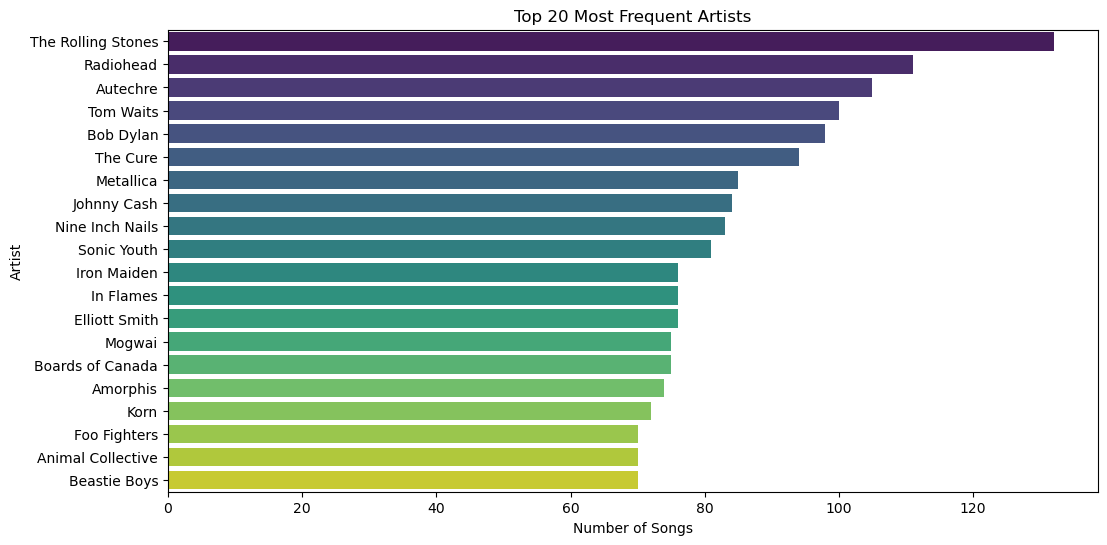

C:\Users\User\AppData\Local\Temp\ipykernel_132176\281438664.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=all_tags, order=all_tags.value_counts().index[:20], palette='viridis')


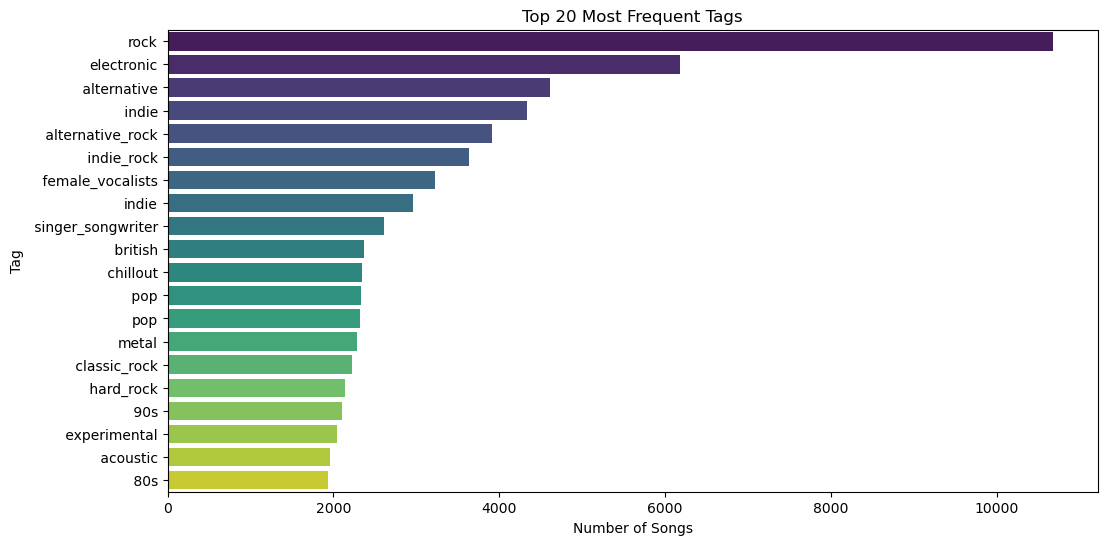

C:\Users\User\AppData\Local\Temp\ipykernel_132176\281438664.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='genre', data=music_list, order=music_list['genre'].value_counts().index, palette='viridis')


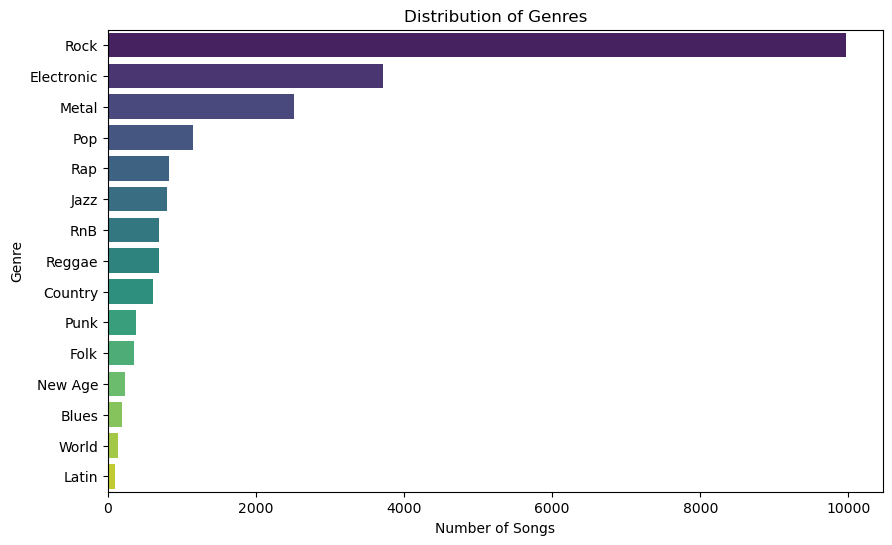

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Top Artists
plt.figure(figsize=(12, 6))
sns.countplot(y='artist', data=music_list, order=music_list['artist'].value_counts().index[:20], palette='viridis')
plt.title('Top 20 Most Frequent Artists')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()

# Visualize Top Tags (requires splitting the comma-separated tags)
# Create a list of all individual tags
all_tags = music_list['tags'].dropna().str.split(',', expand=True).stack().reset_index(drop=True)
plt.figure(figsize=(12, 6))
sns.countplot(y=all_tags, order=all_tags.value_counts().index[:20], palette='viridis')
plt.title('Top 20 Most Frequent Tags')
plt.xlabel('Number of Songs')
plt.ylabel('Tag')
plt.show()


# Visualize Genres
plt.figure(figsize=(10, 6))
sns.countplot(y='genre', data=music_list, order=music_list['genre'].value_counts().index, palette='viridis')
plt.title('Distribution of Genres')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.show()

In [16]:
# Instead of sampling from the original music_list,
# filter music_list to include only the unique tracks present in the user_behavior_list
# after filtering for active users.

# Get the unique track IDs from the user_behavior_list (which has already been filtered for active users)
unique_tracks_in_behavior = user_behavior_list['track_id'].unique()

# Filter the original music_list to keep only these unique tracks
sampled_music_list = music_list[music_list['track_id'].isin(unique_tracks_in_behavior)].copy()

print("Shape of the new sampled_music_list (unique tracks from user behavior):", sampled_music_list.shape)

Shape of the new sampled_music_list (unique tracks from user behavior): (21087, 21)


In [17]:
%pip install sentence-transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

In [19]:
# Fill missing values in 'tags' column with an empty string
sampled_music_list['tags'] = sampled_music_list['tags'].fillna('')

# Create a list of strings from the 'tags' column
tag_strings = sampled_music_list['tags'].tolist()

# Generate embeddings for the list of tag strings
tag_embeddings = sentence_model.encode(tag_strings)

# Create a new DataFrame from the generated embeddings
tag_embeddings_df = pd.DataFrame(tag_embeddings, index=sampled_music_list.index)

# Rename columns appropriately
tag_embeddings_df.columns = [f'tag_embedding_{i}' for i in range(tag_embeddings_df.shape[1])]

display(tag_embeddings_df.head())
print("Shape of tag_embeddings_df:", tag_embeddings_df.shape)

,tag_embedding_0,tag_embedding_1,tag_embedding_2,tag_embedding_3,tag_embedding_4,tag_embedding_5,tag_embedding_6,tag_embedding_7,tag_embedding_8,tag_embedding_9,...,tag_embedding_374,tag_embedding_375,tag_embedding_376,tag_embedding_377,tag_embedding_378,tag_embedding_379,tag_embedding_380,tag_embedding_381,tag_embedding_382,tag_embedding_383
0,0.028219,-0.134598,0.009486,-0.024977,0.020907,0.064192,0.077013,0.035212,-0.015694,0.005487,...,0.042875,-0.048243,-0.055298,0.063190,-0.129543,0.066881,0.039409,-0.035132,0.086346,-0.023261
1,0.011561,-0.171744,0.061596,-0.047362,0.059686,0.058053,0.075832,-0.005415,-0.029382,-0.022505,...,0.085630,-0.006384,-0.055466,0.033675,-0.055235,0.071210,0.020404,0.006950,0.078134,-0.011489
3,0.034156,-0.187334,0.030253,-0.039512,0.028391,0.058892,0.088616,0.001722,-0.018832,-0.000052,...,0.060147,-0.029329,-0.063368,0.025241,-0.085623,0.076967,0.003288,-0.006429,0.083829,0.001821
10,-0.031272,-0.095824,0.005370,-0.041657,0.033241,0.056391,0.068153,0.005688,-0.061087,-0.023113,...,0.111488,-0.031562,-0.078742,0.082583,-0.109927,0.094892,0.023311,-0.043832,0.067977,-0.024604
12,0.054572,-0.188805,0.048396,-0.032572,0.036047,0.031596,0.079121,-0.006234,-0.017096,0.030422,...,0.103856,-0.008144,-0.075644,0.037984,-0.068500,0.052249,0.053752,-0.038941,0.069014,-0.009139


Shape of tag_embeddings_df: (21087, 384)


In [20]:
# Normalize numeric features and one-hot encode categorical features
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_extraction import FeatureHasher # Import FeatureHasher from sklearn.feature_extraction
import pandas as pd
import numpy as np # Import numpy for sampling

# Define numeric features
numeric_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                   'instrumentalness', 'liveness', 'valence', 'tempo', 'year']

# Define categorical features to be one-hot encoded and feature hashed
onehot_features = ['genre']
hash_features = ['artist', 'tags']

# Store the original track_id in a separate column and use a default integer index
original_track_ids = sampled_music_list['track_id']
sampled_music_list = sampled_music_list.reset_index(drop=True) # Reset index to use default integer index

# Separate numeric and categorical data
numeric_data = sampled_music_list[numeric_features]
onehot_data = sampled_music_list[onehot_features]
hash_artist_data = sampled_music_list['artist']
hash_tags_data = sampled_music_list['tags']


# Scale numeric features
scaler = MinMaxScaler()
scaled_numeric_features = scaler.fit_transform(numeric_data)
scaled_numeric_df = pd.DataFrame(scaled_numeric_features, columns=numeric_features) # Use default integer index


# One-hot encode 'genre' feature
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_genre_features = encoder.fit_transform(onehot_data)
ohe_feature_names = encoder.get_feature_names_out(onehot_features)
encoded_genre_df = pd.DataFrame(encoded_genre_features, columns=ohe_feature_names) # Use default integer index


# Feature hash 'artist' and 'tags'
# Ensure data is in the correct format for FeatureHasher (iterable of strings for each sample)
# For artist, wrap in a list
hashed_artist_input = [[str(x)] if pd.notna(x) else [] for x in hash_artist_data]
# For tags, split the comma-separated string into a list
hashed_tags_input = [str(x).split(',') if pd.notna(x) else [] for x in hash_tags_data]


hasher_artist = FeatureHasher(n_features=500, input_type='string')
hashed_artist_features = hasher_artist.fit_transform(hashed_artist_input)
hashed_artist_df = pd.DataFrame(hashed_artist_features.toarray(), columns=[f'hashed_artist_{i}' for i in range(500)]) # Use default integer index

hasher_tags = FeatureHasher(n_features=500, input_type='string')
hashed_tags_features = hasher_tags.fit_transform(hashed_tags_input)
hashed_tags_df = pd.DataFrame(hashed_tags_features.toarray(), columns=[f'hashed_tags_{i}' for i in range(500)]) # Use default integer index

# Ensure tag_embeddings_df has the same index as scaled_numeric_df and other feature dataframes
# Since sampled_music_list was reset_index(drop=True), all subsequent dataframes created from it
# will have a default integer index starting from 0. We just need to make sure tag_embeddings_df
# also has this index. It was created from sampled_music_list with index=sampled_music_list.index,
# which should be the default integer index after reset_index.
tag_embeddings_df = tag_embeddings_df.reset_index(drop=True)

# Concatenate all processed features
# Concatenate along axis=1, pandas will align based on the default integer index
normalized_song_features = pd.concat([scaled_numeric_df, hashed_artist_df, tag_embeddings_df], axis=1)

# Add the original track_ids as a column
normalized_song_features['track_id'] = original_track_ids.values # Assign the stored original track_ids


display(normalized_song_features.head())
print("Shape of normalized_song_features:", normalized_song_features.shape)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year,...,tag_embedding_375,tag_embedding_376,tag_embedding_377,tag_embedding_378,tag_embedding_379,tag_embedding_380,tag_embedding_381,tag_embedding_382,tag_embedding_383,track_id
0,0.360772,0.917998,0.876138,0.078197,0.001195,0.000000,0.097295,0.242915,0.673120,0.866667,...,-0.048243,-0.055298,0.063190,-0.129543,0.066881,0.039409,-0.035132,0.086346,-0.023261,TRIOREW128F424EAF0
1,0.415650,0.891998,0.875933,0.035220,0.000810,0.000000,0.207415,0.658907,0.792698,0.883333,...,-0.006384,-0.055466,0.033675,-0.055235,0.071210,0.020404,0.006950,0.078134,-0.011489,TRRIVDJ128F429B0E8
2,0.283537,0.663993,0.805420,0.038889,0.000391,0.000658,0.133267,0.495951,0.475184,0.866667,...,-0.029329,-0.063368,0.025241,-0.085623,0.076967,0.003288,-0.006429,0.083829,0.001821,TRUEIND128F93038C4
3,0.563008,0.489990,0.818096,0.047904,0.016867,0.000537,0.136273,0.519231,0.382997,0.858333,...,-0.031562,-0.078742,0.082583,-0.109927,0.094892,0.023311,-0.043832,0.067977,-0.024604,TRIODZU128E078F3E2
4,0.822154,0.719994,0.822347,0.142558,0.033835,0.001417,0.827655,0.842105,0.629683,0.916667,...,-0.008144,-0.075644,0.037984,-0.068500,0.052249,0.053752,-0.038941,0.069014,-0.009139,TRYEZGE128F92D04C8


Shape of normalized_song_features: (21087, 895)


In [21]:
# Print the column names of the normalized_song_features DataFrame
print("Columns in normalized_song_features:")
print(normalized_song_features.columns.tolist())

Columns in normalized_song_features:
['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'year', 'hashed_artist_0', 'hashed_artist_1', 'hashed_artist_2', 'hashed_artist_3', 'hashed_artist_4', 'hashed_artist_5', 'hashed_artist_6', 'hashed_artist_7', 'hashed_artist_8', 'hashed_artist_9', 'hashed_artist_10', 'hashed_artist_11', 'hashed_artist_12', 'hashed_artist_13', 'hashed_artist_14', 'hashed_artist_15', 'hashed_artist_16', 'hashed_artist_17', 'hashed_artist_18', 'hashed_artist_19', 'hashed_artist_20', 'hashed_artist_21', 'hashed_artist_22', 'hashed_artist_23', 'hashed_artist_24', 'hashed_artist_25', 'hashed_artist_26', 'hashed_artist_27', 'hashed_artist_28', 'hashed_artist_29', 'hashed_artist_30', 'hashed_artist_31', 'hashed_artist_32', 'hashed_artist_33', 'hashed_artist_34', 'hashed_artist_35', 'hashed_artist_36', 'hashed_artist_37', 'hashed_artist_38', 'hashed_artist_39', 'hashed_artist_40', 'hashed_artist_41', 'ha

## CF via TruncatedSVD + Feature Fusion

1) Collaborative part: TF-IDF weighted user–item matrix → TruncatedSVD (a.k.a. LSA) to get user/item embeddings.
2) Feature fusion: concatenate CF embeddings with your content features (normalized_song_features) and do ANN (cosine).
3) Evaluation: same NDCG / Diversity(ILD) / Novelty helpers

In [22]:
import numpy as np
import pandas as pd
from scipy import sparse
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors

# ---------------------------
# 0) Config
# ---------------------------
N_COMPONENTS = 64     # CF embedding size (like ALS factors)
LAMBDA_CF, LAMBDA_CB = 0.7, 0.3  # weights in fusion
TOPK_KNN = 200
RECO_K   = 20

In [23]:
# ---------------------------
# 1) Utilities
# ---------------------------
def build_weight(row):
    plays  = row.get("playcount", 1) or 1
    boost  = 1.0
    
    return max(0.0, np.log1p(float(plays)) * boost)

def l2norm_rows(X):
    X = X.astype(np.float32, copy=False)
    norms = np.linalg.norm(X, axis=1, keepdims=True) + 1e-12

    return X / norms

# ---------------------------
# 2) ID spaces (align to your 20k catalog)
# ---------------------------
def build_id_spaces(train_df, test_df, sampled_music_list):
    all_users_raw = pd.Index(pd.concat([train_df["user_id"], test_df["user_id"]]).unique())
    catalog_items_raw = pd.Index(sampled_music_list["track_id"].unique())
    all_users = pd.Index(all_users_raw.astype(str))
    catalog_items = pd.Index(catalog_items_raw.astype(str))
    user_to_idx = {u: i for i, u in enumerate(all_users)}
    item_to_idx = {it: j for j, it in enumerate(catalog_items)}

    return all_users, catalog_items, user_to_idx, item_to_idx

In [24]:
# ---------------------------
# 3) User–item matrix with TF-IDF weighting
# ---------------------------
def build_tfidf_interactions(df, all_users, catalog_items, user_to_idx, item_to_idx):
    df = df.copy()
    df["user_id"] = df["user_id"].astype(str)
    df["track_id"] = df["track_id"].astype(str)

    df = df[df["track_id"].isin(catalog_items)]
    rows = df["user_id"].map(user_to_idx).to_numpy()
    cols = df["track_id"].map(item_to_idx).to_numpy()
    data = df.apply(build_weight, axis=1).to_numpy(dtype=np.float32)

    n_users, n_items = len(all_users), len(catalog_items)
    X = sparse.coo_matrix((data, (rows, cols)), shape=(n_users, n_items)).tocsr()

    # TF-IDF on items (reduce popularity bias)
    df_i = np.asarray((X > 0).sum(axis=0)).ravel()
    idf = np.log((n_users + 1) / (df_i + 1)) + 1.0
    X = X @ sparse.diags(idf.astype(np.float32), format="csr")

    return X

# ---------------------------
# 4) TruncatedSVD to get CF embeddings
# ---------------------------
def train_svd_cf(X_train, n_components=N_COMPONENTS, random_state=42):
    # Fit on users x items to get user embeddings
    svd_users = TruncatedSVD(n_components=n_components, random_state=random_state)
    U = svd_users.fit_transform(X_train)                   # (n_users, k)

    # Item embeddings: safest is to fit another SVD on X^T
    svd_items = TruncatedSVD(n_components=n_components, random_state=random_state)
    V = svd_items.fit_transform(X_train.T)                 # (n_items, k)

    # Normalize for cosine
    U = l2norm_rows(U)
    V = l2norm_rows(V)
    
    return {"U": U, "V": V, "svd_users": svd_users, "svd_items": svd_items}

In [26]:
# ---------------------------
# 5) Content matrix aligned to catalog
# ---------------------------
def build_content_matrix(catalog_items, normalized_song_features):
    """
    Returns a (n_items, d_content) float32 matrix aligned to `catalog_items`.
    Robust to track_id being either a column or the index, and to dtype mismatches.
    """

    base = normalized_song_features.copy()

    # 1) Ensure we have a 'track_id' column (not just an index)
    if "track_id" not in base.columns:
        # If track_id is the index name, reset it; otherwise, create it from the index
        if base.index.name and base.index.name.lower() == "track_id":
            base = base.reset_index()
        else:
            base = base.rename_axis("track_id").reset_index()

    # 2) Coerce ID types to a common type to avoid empty joins due to int/str mismatch
    base["track_id"] = base["track_id"].astype(str)
    catalog_as_str = pd.Index(catalog_items.astype(str))

    # 3) Keep only items in the catalog and align order exactly to catalog_items
    base = base[base["track_id"].isin(catalog_as_str)]
    base = base.set_index("track_id").reindex(catalog_as_str)

    # 4) Select only numeric feature columns (ignore any accidental non-numeric cols)
    feat_df = base.select_dtypes(include=[np.number]).fillna(0.0)

    # 5) To numpy + L2 normalize rows for cosine
    Xc = feat_df.to_numpy(dtype=np.float32)
    Xc = l2norm_rows(Xc)
    
    return Xc  # (n_items, d_content)


In [27]:
# ---------------------------
# 6) Feature-level fusion (items + users)
# ---------------------------
def make_item_hybrid(item_cf, item_content, lambda_cf=LAMBDA_CF, lambda_cb=LAMBDA_CB):
    V_cf = l2norm_rows(item_cf)
    V_cb = l2norm_rows(item_content)
    V = np.hstack([lambda_cf * V_cf, lambda_cb * V_cb]).astype(np.float32, copy=False)
    V = l2norm_rows(V)
    
    return V

def make_user_hybrid(uidx, cf_pack, train_df, item_content, item_to_idx, all_users,
                     lambda_cf=LAMBDA_CF, lambda_cb=LAMBDA_CB):
    u_cf = cf_pack["U"][uidx]  # (k,)
    user_id = all_users[uidx]
    
    # content profile from TRAIN history
    hist = train_df.loc[train_df["user_id"].astype(str) == user_id, "track_id"].astype(str).map(item_to_idx)
    hist = hist.dropna().astype(int).tolist()
    if not hist:
        u_cb = np.zeros((item_content.shape[1],), dtype=np.float32)
    else:
        V = item_content[np.array(hist)]
        u_cb = V.mean(axis=0)
        u_cb = u_cb / (np.linalg.norm(u_cb) + 1e-12)

    u = np.concatenate([lambda_cf * u_cf, lambda_cb * u_cb]).astype(np.float32)
    u = u / (np.linalg.norm(u) + 1e-12)

    return u

In [28]:
# ---------------------------
# 7) ANN over items
# ---------------------------
def build_knn(item_hybrid, n_neighbors=TOPK_KNN):
    nn = NearestNeighbors(metric="cosine", n_neighbors=n_neighbors, n_jobs=-1)
    nn.fit(item_hybrid)

    return nn

# ---------------------------
# 8) Recommend for a user_id
# ---------------------------
def recommend_for_user(user_id, cf_pack, ann, train_df, all_users, catalog_items, user_to_idx, item_to_idx, item_content, item_hybrid, k=RECO_K):
    user_id = str(user_id)
    if user_id not in all_users:
        raise ValueError("User not found in index space.")
    uidx = all_users.get_loc(user_id)
    u = make_user_hybrid(uidx, cf_pack, train_df, item_content, item_to_idx, all_users)

    distances, indices = ann.kneighbors(u.reshape(1, -1), n_neighbors=min(TOPK_KNN, len(catalog_items)))
    distances, indices = distances[0], indices[0]
    scores = 1.0 - distances

    seen = set(train_df.loc[train_df["user_id"].astype(str) == user_id, "track_id"].astype(str))
    rec = []
    for j, s in zip(indices, scores):
        tid = catalog_items[j]
        if tid in seen:
            continue
        rec.append((tid, float(s)))
        if len(rec) >= k:
            break
        
    return pd.DataFrame(rec, columns=["track_id", "hybrid_score"])

### Evaluation using NDCG, Diversity and Novelty

In [29]:
# === import your standalone evaluator ===
# Make sure standalone_evaluation_metrics.py is in the same folder / on PYTHONPATH
from standalone_evaluation_metrics import evaluate_recommendations, print_evaluation_summary

# ---------------------------
# 9) Build recommendations dict for evaluator
#     -> {user_idx: np.ndarray([item_idx, ...])}
# ---------------------------
def build_recommendations_dict(cf_pack, ann, train_df, all_users, catalog_items,
                               user_to_idx, item_to_idx, item_content, item_hybrid, k=RECO_K):
    recs_dict = {}
    for uidx, user_id in enumerate(all_users):
        rec_df = recommend_for_user(user_id, cf_pack, ann, train_df, all_users, catalog_items,
                                    user_to_idx, item_to_idx, item_content, item_hybrid, k=k)
        # map track_id (string) -> item index
        item_idxs = rec_df["track_id"].map(item_to_idx).dropna().astype(int).to_numpy()
        recs_dict[uidx] = item_idxs
        
    return recs_dict

In [30]:
# ---------------------------
# 10) End-to-end run
# ---------------------------
# Build aligned id spaces
all_users, catalog_items, user_to_idx, item_to_idx = build_id_spaces(train_df, test_df, sampled_music_list)

# TF-IDF weighted interactions
X_train = build_tfidf_interactions(train_df, all_users, catalog_items, user_to_idx, item_to_idx)

# CF embeddings via TruncatedSVD
cf_pack = train_svd_cf(X_train, n_components=N_COMPONENTS)

# Content matrix (uses your normalized_song_features)
item_content = build_content_matrix(catalog_items, normalized_song_features)

# Hybrid item vectors + ANN
item_hybrid = make_item_hybrid(cf_pack["V"], item_content, lambda_cf=LAMBDA_CF, lambda_cb=LAMBDA_CB)
ann = build_knn(item_hybrid, n_neighbors=TOPK_KNN)

# Example user
u0 = str(train_df["user_id"].iloc[0])
print("User ID:", u0)
print("Top 20 Recommended Tracks:")

recs = recommend_for_user(u0, cf_pack, ann, train_df, all_users, catalog_items,
                          user_to_idx, item_to_idx, item_content, item_hybrid, k=RECO_K)

# Join for display
cols_to_show = ["track_id", "name", "artist", "genre", "year"]
display(recs.merge(sampled_music_list[cols_to_show], on="track_id", how="left"))

# ===========================
# INSPECTION
# ===========================
print("\n=== DATA INSPECTION BEFORE EVALUATION ===")
print(f"train_df shape: {train_df.shape}")
print(train_df.head())

print(f"\ntest_df shape: {test_df.shape}")
print(test_df.head())

print(f"\nNumber of users in mapping: {len(user_to_idx)}")
print("Sample user_to_idx:", dict(list(user_to_idx.items())[:5]))

print(f"\nNumber of items in mapping: {len(item_to_idx)}")
print("Sample item_to_idx:", dict(list(item_to_idx.items())[:5]))

# ===========================
# EVALUATION (standalone module)
# ===========================
# Build recommendations dict expected by the evaluator
recommendations = build_recommendations_dict(
    cf_pack, ann, train_df, all_users, catalog_items,
    user_to_idx, item_to_idx, item_content, item_hybrid, k=20
)

print("Evaluation on Top 10 Recommendation...")

# Run comprehensive evaluation across multiple k values
results = evaluate_recommendations(
    recommendations=recommendations,
    train_df=train_df,
    test_df=test_df,
    user_to_idx=user_to_idx,
    item_to_idx=item_to_idx,
    item_content=item_content,
    k_values=[5, 10, 15, 20],    # you can change this as needed
    metrics=None             # None = run all metrics in the module
)

print_evaluation_summary(results)

User ID: 0030f00cd1d9ccbff086e4ee6541a599484df3b0
Top 20 Recommended Tracks:


,track_id,hybrid_score,name,artist,genre,year
0,TRBDCVK128F4234243,0.592066,Gunpowder,Black Joe Lewis & The Honeybears,NaN,2009
1,TRQRACI128F92FE501,0.591370,Paris 2004,Peter Bjorn and John,Rock,2007
2,TREGDWH128F4248881,0.580544,Ce Jeu,Yelle,NaN,2008
3,TRZJGCC128F427A496,0.576061,For Emma,Bon Iver,Folk,2008
4,TRWXGNI128F92FEA92,0.566610,Marla,Grizzly Bear,Rock,2006
5,TRCRDSB128F92C701A,0.564406,Run My Mouth,Ra Ra Riot,Rock,2008
6,TRBXLFU128F427A494,0.563634,Creature Fear,Bon Iver,Folk,2007
7,TRDAIAV128EF36759E,0.563571,Impossible Germany,Wilco,Rock,2008
8,TRUFOQE128F42813EB,0.558201,In Our Talons,Bowerbirds,Rock,2007
9,TRYBFNR128F426BE3D,0.557143,Flume,Bon Iver,Folk,2009



=== DATA INSPECTION BEFORE EVALUATION ===
train_df shape: (301961, 3)
                   track_id                                   user_id  \
4248233  TRUWVZG128F92E379D  0030f00cd1d9ccbff086e4ee6541a599484df3b0   
4248282  TRVYYDA128F93501B9  0030f00cd1d9ccbff086e4ee6541a599484df3b0   
4248232  TRWZJEM128F93501BF  0030f00cd1d9ccbff086e4ee6541a599484df3b0   
4248265  TRLTISM128F424FEFB  0030f00cd1d9ccbff086e4ee6541a599484df3b0   
4248273  TROENFE128F932DFBB  0030f00cd1d9ccbff086e4ee6541a599484df3b0   

         playcount  
4248233          1  
4248282          1  
4248232          1  
4248265          1  
4248273          2  

test_df shape: (75420, 3)
                   track_id                                   user_id  \
1129264  TRLCRRV128F4298854  aaa06c291a26cf847f16fb44fee39c08753799ec   
2814532  TRASVEM128E0796553  f3b49cd26f4e3ffce4e354cad75cac446f06dc7c   
6746725  TRMFITQ128F425DC36  7f69cd3bc11f54c2d5134aa5df16d91cd6fddf65   
4150857  TRXFKAF128E078884E  7557a1fb62b97d4c

In [38]:
# -----------------------------------------------------------------------------
# Hybrid Recommender: TruncatedSVD (Collaborative) + Content Feature Fusion + ANN
# -----------------------------------------------------------------------------
# Approach summary
# - Collaborative filtering (CF): build a user–item implicit matrix from train_df,
#   weight each interaction (log1p(playcount) * like_boost * (1 - skip_rate)),
#   apply item-side IDF to reduce popularity bias, then learn latent factors
#   with TruncatedSVD to obtain dense user and item embeddings (U, V).
#
# - Content-based (CB): use preprocessed item content features
#   (normalized_song_features; numeric + hashed text/tag features) aligned by track_id,
#   L2-normalize rows so cosine similarity is meaningful.
#
# - Feature-level hybrid: for each item, concatenate the CF embedding and the
#   content vector with tunable weights (lambda_cf, lambda_cb), then L2-normalize
#   the fused vector. For each user, fuse their CF embedding with a content
#   profile (mean of content vectors for items they consumed in TRAIN), then
#   L2-normalize to create a single hybrid user vector.
#
# - Retrieval: build a cosine ANN (NearestNeighbors) on the hybrid item vectors
#   and query it with the hybrid user vector to get top-K candidates in one pass.
#   Mask training items when recommending/evaluating to avoid leakage.
#
# Why these choices
# - TruncatedSVD on a TF-IDF weighted interaction matrix is a pure-Python,
#   wheel-free alternative to ALS/BPR that captures collaborative structure
#   and runs reliably on Python 3.13.
# - Feature-level fusion (concat + weights) lets us balance CF vs Content signals
#   without training a separate re-ranker; single ANN lookup keeps latency low.
# - Cosine similarity + L2-normalization makes scores scale-invariant and stable.
#
# Key implementation details
# - ID alignment: everything (embeddings, content features, ANN index) is aligned
#   to the same catalog_items order via explicit reindex by track_id.
# - Weights: build_weight() compresses heavy users (log1p) and adjusts for likes
#   and skips; TF-IDF step downweights items that are popular with many users.
# - User content profile: built only from TRAIN interactions to prevent test leakage;
#   mean pooling is used (can be changed to weight by build_weight()).
# - ANN: sklearn NearestNeighbors(metric="cosine") is sufficient for ~20k items;
#   can switch to FAISS/HNSW for 100k+ catalogs.
#
# Evaluation (offline)
# - NDCG@k: ranking quality vs held-out TEST positives (binary relevance).
# - Diversity (ILD)@k: 1 - cosine(content_i, content_j) averaged over all pairs
#   in a user’s recommended list → higher = more diverse.
# - Novelty@k: -log2(popularity) where popularity is #unique TRAIN users per item
#   (Laplace smoothed) → higher = more novel/long-tail.
#
# Tunable knobs
# - N_COMPONENTS: CF latent size (try 32/64/128).
# - LAMBDA_CF / LAMBDA_CB: tradeoff between CF and Content in fusion;
#   raise LAMBDA_CB for cold/sparse users, raise LAMBDA_CF for very active users.
# - TOPK_ANN / RECO_K: retrieval breadth vs final list length.
#
# What you get
# - A single-pass hybrid recommender that blends behavior + content, avoids
#   heavy native builds, and provides standard offline metrics (NDCG, ILD, Novelty).
# -----------------------------------------------------------------------------
